# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [9]:
pip install -U scikit-learn scipy matplotlib

     |████████████████████████████████| 7.1 MB 591 kB/s eta 0:00:01     |██▌                             | 552 kB 1.1 MB/s eta 0:00:06
Requirement already up-to-date: scipy in /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages (1.4.1)
Requirement already up-to-date: matplotlib in /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages (3.2.1)
     |████████████████████████████████| 294 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [46]:
import pandas as pd
import numpy as np
import scipy as ss

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
student_data = pd.DataFrame({'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [12]:
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

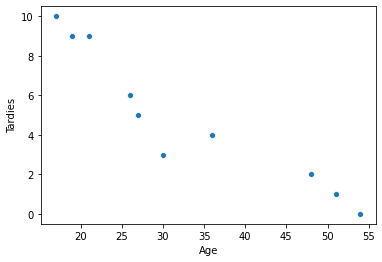

In [13]:
sns.scatterplot(x = student_data['Age'], y = student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

**Answer: Yes, we can see that the points approach a line, with a negative correlation. So, when the age increases, the tardies descreases.**

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [14]:
student_data.cov()

,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


In [15]:
student_data.corr()

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


**Answer: Covariance is a measure of the degree of numerical interdependence (or interrelation) between two random variables, called linear dependency measure. Thus, independent variables have zero covariance. 
Covariance is similar to the correlation between two variables, however, they differ in the following ways: 1. The correlation coefficients are standardized. Thus, a perfect linear relationship results in a correlation coefficient 1. The correlation measures the strength and the direction of the linear relationship between two variables. 2. The covariance values are not standardized. Therefore, covariance can vary from less infinite to more infinite. Thus, the value for an ideal linear relationship depends on the data. As the data are not standardized, it is difficult to determine the strength of the relationship between the variables.**

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
regression_model = LinearRegression()

In [62]:
x = student_data[['Age']]
y = student_data['Tardies']

In [63]:
regression_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred = regression_model.predict(x)
student_data['pred_tardies']
y_pred

array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
        1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024])

In [65]:
student_data.head(5)

,StudentID,Age,Tardies,pred_tardies
0,1,17,10,8.760850
1,2,51,1,0.504944
2,3,27,5,6.332643
3,4,21,9,7.789567
4,5,36,4,4.147256


Plot your regression model on your scatter plot.

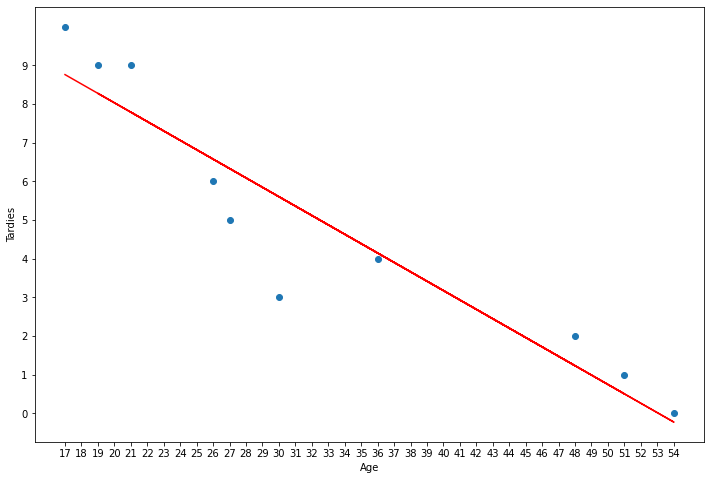

In [66]:
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Tardies')

plt.yticks(np.arange(0, 10, step=1))
plt.xticks(np.arange(17, 55, step=1))
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

**This is the linear regression equation: y= mX + b, y: target variable / x: feature variables**

In [69]:
b = regression_model.coef_
b

array([-0.24282077])

In [71]:
m = regression_model.intercept_
m

12.888803363135771

In [73]:
regression_model.score(x,y)

0.8820265558250109

**Answer: Coeficient: every year of increasing in age, it will represent a decrease of 24% in tardies.
Intercept: it can be interpreted as the value of the dependent variable, if all other variables are zero, that is, the tardies value if age is zero, in this case is 12.88.
R²: value that explains the model of linear regression, that is, if the value is closer to 1, more variables explain the model, and if is is closer to 0, less variables explain the model. In this case, the number is 0.88, that is, the variables are very explanatory.**

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [90]:
pip install statsmodels

     |████████████████████████████████| 8.4 MB 291 kB/s eta 0:00:01
     |████████████████████████████████| 231 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [91]:
vehicles = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/vehicles.csv')
vehicles.head(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [92]:
new_vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
new_vehicles.head(5)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [93]:
new_vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


**Answer: The variable most important in determining CO2 emissions would be Fuel Barrels/Year (with very strong correlation - 0.98). In other hand, Year would be the least important (with little correlation - -0.22).**

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [117]:
regression_model = LinearRegression()

In [118]:
x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

In [119]:
regression_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
y_pred = regression_model.predict(x)
new_vehicles['CO2 Emission Grams/Mile']
y_pred

array([522.03038361, 671.00105318, 552.68495072, ..., 230.01342446,
       229.69280773, 239.33283552])

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [121]:
import statsmodels.api as sm

In [127]:
x = sm.add_constant(x)
regression_model = sm.OLS(y,x)
results = regression_model.fit()
predictions = results.predict(x)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                             13:34:11   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Answer: The R² is very high (0.981), as we could see before, the variables have a strong multicollinearity. The most important variable in this model is Fuel Barrels/Year, the coeficient is high and this variable have a strong and positive correlation with CO2 Emission Grams/Mile.**

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [161]:
df = pd.DataFrame({'Invited': [1, 3, 4, 6, 8, 9, 11, 14], 'Attended': [1, 2, 4, 4, 5, 7, 8, 13]})
df

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

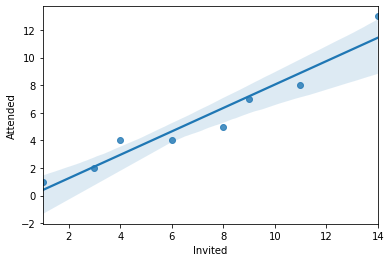

In [162]:
sns.regplot(df['Invited'], df['Attended']);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [163]:
regression_model = LinearRegression()

In [164]:
x = df[['Invited']]
y = df[['Attended']]

In [165]:
regression_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
y_pred = regression_model.predict(x)
y_pred

array([[ 0.40909091],
       [ 2.10606061],
       [ 2.95454545],
       [ 4.65151515],
       [ 6.34848485],
       [ 7.1969697 ],
       [ 8.89393939],
       [11.43939394]])

In [167]:
df.corr()

,Invited,Attended
Invited,1.00000,0.96523
Attended,0.96523,1.00000


In [168]:
regression_model.coef_

array([[0.84848485]])

In [169]:
regression_model.score(x,y)

0.9316696375519905

**Answer: We have a strong and positive correlation between the variables Invited and Attended.**

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [171]:
df = df.drop(7)
df

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


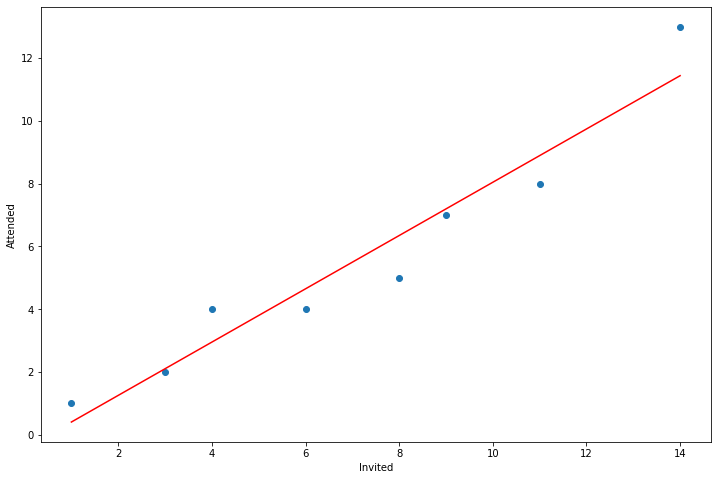

In [173]:
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Invited')
plt.ylabel('Attended')

plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [174]:
regression_model = LinearRegression()

In [175]:
x = df[['Invited']]
y = df[['Attended']]

In [176]:
regression_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
y_pred = regression_model.predict(x)
y_pred

array([[1.0075188 ],
       [2.37593985],
       [3.06015038],
       [4.42857143],
       [5.79699248],
       [6.48120301],
       [7.84962406]])

In [178]:
df.corr()

,Invited,Attended
Invited,1.000000,0.971278
Attended,0.971278,1.000000


In [179]:
regression_model.coef_

array([[0.68421053]])

In [180]:
regression_model.score(x,y)

0.9433811802232855

**Answer: After withdrawing the outline, we could see that the correlation and the R² increases a little bit.**